In [380]:
ALPHABET = "АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"

def prepare_text(text):
    return ''.join(ch for ch in text.upper() if ch in ALPHABET)

def get_char_index(c):
    return ALPHABET.index(c)


def to_int_array(text):
    l = []
    for elem in text:
        l.append(get_char_index(elem))
    return l

def encrypt(text,key):
    encrypted = ''
    N = len(ALPHABET)
    text = prepare_text(text)
    key = to_int_array(key)
    text = to_int_array(text)
    
    for i in range(len(text)):
        key_index = i % len(key)
        new_index = (text[i] + key[key_index] ) % N # +1, enumeration from 1
        new_letter = ALPHABET[new_index]
        encrypted += new_letter
    return encrypted

def decrypt(text,key, is_int = False):
    decrypted = ''
    N = len(ALPHABET)
    if not is_int:
        text = to_int_array(text)
        key = to_int_array(key)
    for i in range(len(text)):
        key_index = i % len(key)
        new_index = (text[i] - key[key_index] ) % N # +1, enumeration from 1
        new_letter = ALPHABET[new_index]
        decrypted += new_letter
    return decrypted


In [381]:
text = ''' 
Истоки  современного,  так  сказать, ди-джейского  отношения  к  музыке
следует искать на Ямайке. Там уже в  середине  50-х  годов действовало более
250  саундсистем  (soundsystems).  Они   состояли  из   колонок,  усилителя,
проигрывателя грампластинок и грузовика, на котором все это добро разъезжало
по дорогам. Но саундсистема -  это,  разумеется, не столько гора аппаратуры,
сколько  кустарное  предприятие  по организации дискотек на  свежем воздухе.
Саундсистемы заводили ритм-н-блюз, изготовленный в южных штатах США. Почему,
собственно,  именно   его?   А   потому,   что   причиной   возникновения  и
распространения  саундсистем  было то,  что  далеко  не  все  жители  Ямайки
обладали Портативными  радиоприемниками.  Особенным шиком считалось  слушать
транзистор  на  улице. А из  ямайских радиоприемников  неслись,  разумеется,
программы  южных  радиостанций  США.  Устроить саундсистему,  чтобы  орошать
модной музыкой всю улицу, - это довольно логичный шаг.

'''
key = 'БВ'
encrypted_text = encrypt(text,key)
print(encrypted_text)

ЙУУРЛКТРГТЁОЁПОРДРУВЛУЛВИВУЮЕКЕИЁЛТМПЕПРУППЪЁПЙБЛОФЙЬМЁУМЖЕХЁФЙУЛВУЮОВАОБЛЛЖУВНХЗЖГУЁТЁЁЙПЁЧДРЕРГЁЁЛТФГРГВМРВРМЖЁУБХОЁТКТФЁОППЙУПУУРАНЙКИМПНПППМФУЙНЙФЁНАССРЙЕСЭГВУЖМБДТБОРНБУУКОРЛКДТФЙПДЙМБПБМПФПТПОГУЁЯУРЕРВТПТБЙЫЖИИБНПСПЁПТПЕБООРТВФПЕУЙУУЖНВЮФПТБЙФОЁЖУУАПЁУУРМЮЛРДРСВБСРВСВУХСЭТМПНЭМПМФУУВСППЖРТЁЁРТЙБУКЁСПРСЕБПЙЙБШЙКЕКТМПФЁМОВТДЁИЁОГРИЁФЧЁУБХОЁТКТФЁОЬЙБДПЁЙНЙТЙФНПВНЯЙЙЙДРУРГНЁПОЭКДЯИОЭЦЪУВУВЦУЩВРРШЖНХТРВУУДЁПОРЙОЁПОРЁЕПВРРУРНХШФПССКШКОРКДПЙОКЛППДЁПЙБЙТБУРТПУУТБПЁПЙБТВФПЕУЙУУЖНГЬНПФПЩУРЕВМЖЛРОЖГУЁИЙФЁНЙБНВКМЙРВНБЁБНЙСПТУВУКГПЬОЙТБЁЙРРТЙЖНПЙМБОЙРТРВЖОПЬОЩКЛРНУШКУВМРТЮТНФЪБФЭФСВОЙЙУУРСПБХМКЧЖБКИБНВКУЛКЦТБЁЙРРТЙЖНПЙМПДОЖТНЙУЭТБЙФОЁЖУУАССРДТБОНЭЯИОЭЦТБЁЙРТФБПЧККУЩВФУУТПКУЮТВФПЕУЙУУЖНХШФПГЬРСРЩВУЮНРЕППЛНХИЭЛРКДТАФНЙШФЯУРЕРГРМЮОРМРДКШПЬЛЩВД


In [382]:
decrypt(encrypted_text,key)

'ИСТОКИСОВРЕМЕННОГОТАКСКАЗАТЬДИДЖЕЙСКОГООТНОШЕНИЯКМУЗЫКЕСЛЕДУЕТИСКАТЬНАЯМАЙКЕТАМУЖЕВСЕРЕДИНЕХГОДОВДЕЙСТВОВАЛОБОЛЕЕСАУНДСИСТЕМОНИСОСТОЯЛИИЗКОЛОНОКУСИЛИТЕЛЯПРОИГРЫВАТЕЛЯГРАМПЛАСТИНОКИГРУЗОВИКАНАКОТОРОМВСЕЭТОДОБРОРАЗЪЕЗЖАЛОПОДОРОГАМНОСАУНДСИСТЕМАЭТОРАЗУМЕЕТСЯНЕСТОЛЬКОГОРААППАРАТУРЫСКОЛЬКОКУСТАРНОЕПРЕДПРИЯТИЕПООРГАНИЗАЦИИДИСКОТЕКНАСВЕЖЕМВОЗДУХЕСАУНДСИСТЕМЫЗАВОДИЛИРИТМНБЛЮЗИЗГОТОВЛЕННЫЙВЮЖНЫХШТАТАХСШАПОЧЕМУСОБСТВЕННОИМЕННОЕГОАПОТОМУЧТОПРИЧИНОЙВОЗНИКНОВЕНИЯИРАСПРОСТРАНЕНИЯСАУНДСИСТЕМБЫЛОТОЧТОДАЛЕКОНЕВСЕЖИТЕЛИЯМАЙКИОБЛАДАЛИПОРТАТИВНЫМИРАДИОПРИЕМНИКАМИОСОБЕННЫМШИКОМСЧИТАЛОСЬСЛУШАТЬТРАНЗИСТОРНАУЛИЦЕАИЗЯМАЙСКИХРАДИОПРИЕМНИКОВНЕСЛИСЬРАЗУМЕЕТСЯПРОГРАММЫЮЖНЫХРАДИОСТАНЦИЙСШАУСТРОИТЬСАУНДСИСТЕМУЧТОБЫОРОШАТЬМОДНОЙМУЗЫКОЙВСЮУЛИЦУЭТОДОВОЛЬНОЛОГИЧНЫЙШАГ'

## автокорреляционный анализ

In [383]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))

deltas = range(2,50)
gammas = []

for delta in deltas:
    num = 0
    for i,ch in enumerate(encrypted_text):
        if i+delta < len(encrypted_text) and ch == encrypted_text[i+delta]:
            num +=1
    gamma = num / (len(encrypted_text) - delta)
    gammas.append(gamma)
            
 

<Figure size 360x360 with 0 Axes>

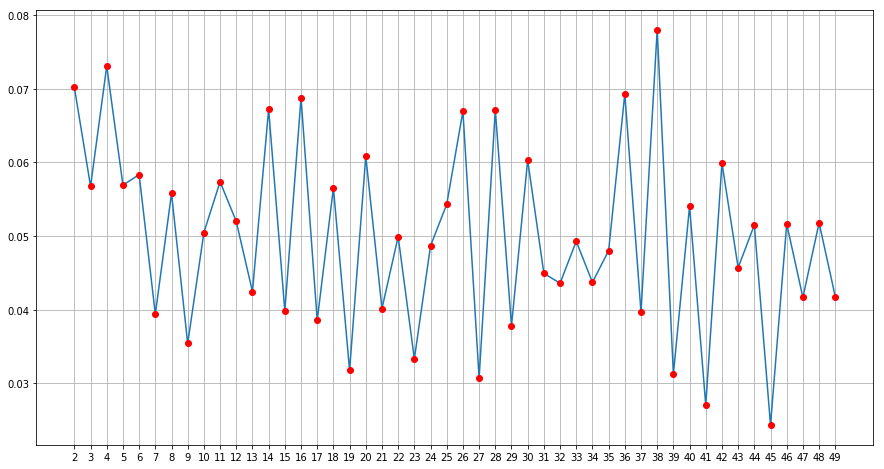

In [384]:
plt.plot(deltas, gammas)
plt.plot(deltas, gammas,'ro',color = 'red')
plt.grid(True)
plt.xticks(deltas)

plt.show()

## итог : длина ключа

In [385]:
key_length = 2

In [386]:
len(key)

2

## Частотный анализ

In [387]:
def get_text_chunks(text,key_len):
    texts = []
    for i in range(0,key_len):
        x = []
        start = i
        while start < len(text):
            x.append(get_char_index(text[start]))
            start += key_len
        texts.append(x)
    return texts


In [388]:
codes_encrepted = get_text_chunks(encrypted_text,key_length)

range(1, 33)
range(1, 33)


<function matplotlib.pyplot.show(*args, **kw)>

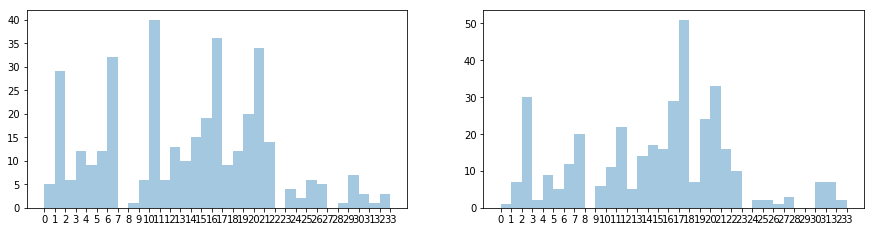

In [389]:
plt.figure(1)
for i in range(key_length):
    plt.subplot(221+i)
    plt.hist(codes_encrepted[i], bins=range(0, len(ALPHABET) + 1),alpha=0.4)
    plt.xticks(range(0, len(ALPHABET) + 1))
    print(range(1, len(ALPHABET)))
plt.show

In [390]:
ALPHABET_FREQ = {
    "А": 0.07821,
    "Б": 0.01732,
    "В": 0.04491,
    "Г": 0.01698,
    "Д": 0.03103,
    "Е": 0.08567,
    "Ё": 0.0007,
    "Ж": 0.01082,
    "З": 0.01647,
    "И": 0.06777,
    "Й": 0.01041,
    "К": 0.03215,
    "Л": 0.04813,
    "М": 0.03139,
    "Н": 0.0685,
    "О": 0.11394,
    "П": 0.02754,
    "Р": 0.04234,
    "С": 0.05382,
    "Т": 0.06443,
    "У": 0.02882,
    "Ф": 0.00132,
    "Х": 0.00833,
    "Ц": 0.00333,
    "Ч": 0.01645,
    "Ш": 0.00775,
    "Щ": 0.00331,
    "Ъ": 0.00023,
    "Ы": 0.01854,
    "Ь": 0.02106,
    "Э": 0.0031,
    "Ю": 0.00544,
    "Я": 0.01979,
}

In [391]:
encrypted_codes_histograms = []
for codes in codes_encrepted:
    histogram,bins = np.histogram(codes, bins=range(0, len(ALPHABET) + 1), density=True)
    encrypted_codes_histograms.append(histogram)

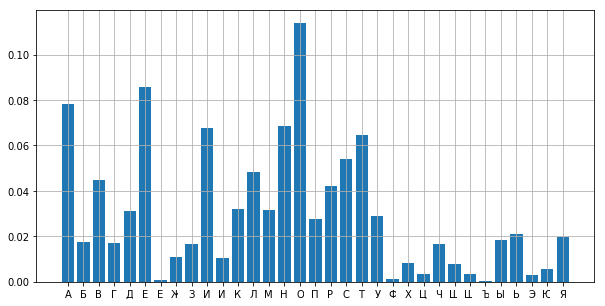

In [392]:
def plot_bar(x,y):
    plt.figure(figsize=(10,5))
    plt.bar(x,height = y)
    plt.xticks(x)
    plt.grid(True)
    plt.show()
    
plot_bar(list(ALPHABET_FREQ.keys()),list(ALPHABET_FREQ.values()))

In [393]:
def shift(l, n):
    return l[n:] + l[:n]

def corr(x,y):
    corrcoefs = []
    for delta in range(0,33):
        corrcoef = np.corrcoef(x,shift(y,delta))[0][1]
        corrcoefs.append(corrcoef)
    
    plot_bar(range(0, len(ALPHABET)),corrcoefs)

alphabet_distr = list(ALPHABET_FREQ.values())



    

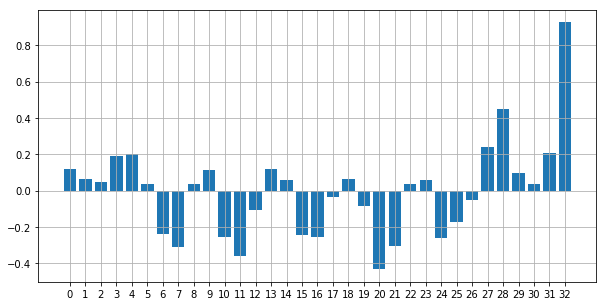

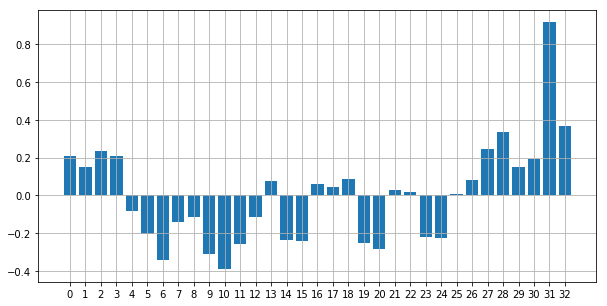

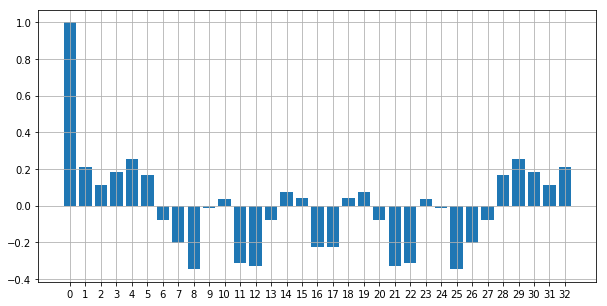

In [394]:
for code in encrypted_codes_histograms:
    corr(code,alphabet_distr)
    
corr(alphabet_distr,alphabet_distr)
    

In [395]:
result = [ 1,2]
    
result_key = ''
for index in result:
    result_key += ALPHABET[index]

print(result_key,key)

БВ БВ


In [396]:
code_encr = []
for x1,x2 in zip(codes_encrepted[0],codes_encrepted[1]):
    code_encr.append(x1)
    code_encr.append(x2)
    

code_decr = decrypt(code_encr,result,is_int = True)

    

In [397]:
code_decr

'ИСТОКИСОВРЕМЕННОГОТАКСКАЗАТЬДИДЖЕЙСКОГООТНОШЕНИЯКМУЗЫКЕСЛЕДУЕТИСКАТЬНАЯМАЙКЕТАМУЖЕВСЕРЕДИНЕХГОДОВДЕЙСТВОВАЛОБОЛЕЕСАУНДСИСТЕМОНИСОСТОЯЛИИЗКОЛОНОКУСИЛИТЕЛЯПРОИГРЫВАТЕЛЯГРАМПЛАСТИНОКИГРУЗОВИКАНАКОТОРОМВСЕЭТОДОБРОРАЗЪЕЗЖАЛОПОДОРОГАМНОСАУНДСИСТЕМАЭТОРАЗУМЕЕТСЯНЕСТОЛЬКОГОРААППАРАТУРЫСКОЛЬКОКУСТАРНОЕПРЕДПРИЯТИЕПООРГАНИЗАЦИИДИСКОТЕКНАСВЕЖЕМВОЗДУХЕСАУНДСИСТЕМЫЗАВОДИЛИРИТМНБЛЮЗИЗГОТОВЛЕННЫЙВЮЖНЫХШТАТАХСШАПОЧЕМУСОБСТВЕННОИМЕННОЕГОАПОТОМУЧТОПРИЧИНОЙВОЗНИКНОВЕНИЯИРАСПРОСТРАНЕНИЯСАУНДСИСТЕМБЫЛОТОЧТОДАЛЕКОНЕВСЕЖИТЕЛИЯМАЙКИОБЛАДАЛИПОРТАТИВНЫМИРАДИОПРИЕМНИКАМИОСОБЕННЫМШИКОМСЧИТАЛОСЬСЛУШАТЬТРАНЗИСТОРНАУЛИЦЕАИЗЯМАЙСКИХРАДИОПРИЕМНИКОВНЕСЛИСЬРАЗУМЕЕТСЯПРОГРАММЫЮЖНЫХРАДИОСТАНЦИЙСШАУСТРОИТЬСАУНДСИСТЕМУЧТОБЫОРОШАТЬМОДНОЙМУЗЫКОЙВСЮУЛИЦУЭТОДОВОЛЬНОЛОГИЧНЫЙША'

In [ ]:
TODO доделать так чтобы не обрезался в конце текст